In [19]:
#import necessary libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [20]:
#defining the cost function J(theta)
def costFunction(theta,xs,y):
    J = 0.
    for i in range(1,len(y)):
        J = J + (1/(2*len(y)))*((np.dot(xs,theta)-y[i]))**2
        return J

#defining the batch gradient descent algorihtm
def gradientDescent(xs, y, theta, alpha, m, iterations):
    xTrans = xs.transpose()
    for i in range(0, iterations):
        hypothesis = np.dot(xs, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

#function to  plot a straight line given the slope and intercept
def abline(slope, intercept):
    axes = mpl.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    mpl.plot(x_vals, y_vals, '--')

[0.43979125 0.99539474]


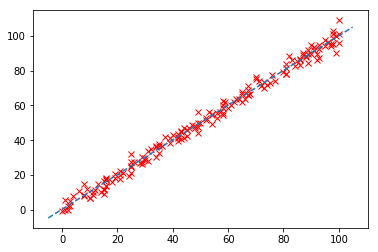

In [21]:
#Load the input and outputs from the source
data_url="train.csv"
data=pd.read_csv(data_url)
xs=pd.DataFrame({'x0':1.,'x':data.X})
x=data.X.values
y=data.Y.values

#Plot the obtained data
mpl.plot(x,y,'rx')
theta=pd.DataFrame({'theta':[0.]*2})
thetaT=theta.T
numIterations= 10000
m, n = np.shape(xs)
alpha = 0.0005
theta = np.ones(n)

#optimize the cost function by reaching a minimum values for theta using gradient descent algorithm
theta = gradientDescent(xs, y, theta, alpha, m, numIterations)
print(theta)

#plot a straight line through the datapoints for the computed theta
abline(theta[1],theta[0])

In [22]:
#Load the test data
testurl="test.csv"
testdata=pd.read_csv(testurl)
xstest=pd.DataFrame({'x0':1.,'x':testdata.X})
m, n = np.shape(xstest)
xtest=testdata.X.values
ytest=testdata.Y.values

#Compare the actual and computed results
ycompute=np.dot(xstest,theta)
loss=ycompute-ytest
print("Average error in test data is %f"%np.mean(loss))

Average error in test data is 0.356289
